## Gestalt Principles: Similarity, Connection, Proximity, Enclosure


### Import required packages

In [52]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read a parquet data file

In [53]:
df_students=pd.read_parquet('students.parquet', engine='pyarrow', dtype_backend='pyarrow')
df_students.rename(columns={'race/ethnicity':'race'},inplace=True)
df_students

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Explore the different columns of this dataframe

In [54]:
df_students.race.value_counts()


race
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64[pyarrow]

In [55]:
df_students['parental level of education'].value_counts()


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64[pyarrow]

In [56]:
df_students['lunch'].value_counts()


lunch
standard        645
free/reduced    355
Name: count, dtype: int64[pyarrow]

In [57]:
df_students['test preparation course'].value_counts()


test preparation course
none         642
completed    358
Name: count, dtype: int64[pyarrow]

In [59]:
df_students['total']=df_students['math score']+df_students['writing score']+df_students['reading score']
df_students

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


### Principle 1 : Similarity (Using color)

Bad example : The below plot shows Maths vs Reading marks of the 1000 students from above dataframe

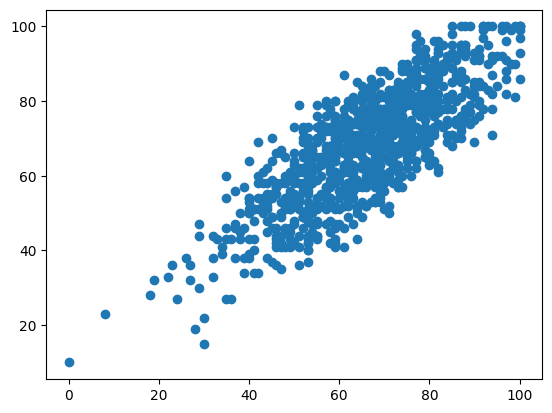

In [60]:
plt.scatter(df_students['math score'], df_students['writing score'])

Good Example : The same plot showing similarity between Gender : Meaning all Males are in Orange color and all feamles are in blue color.
Here Colour was used. Other alternative is to use shapes.
The law of similarity in gestalt theory states that elements that look similar to each other are grouped together in the mind.
As we can in the graph below, females performed well than males in terms of scores.

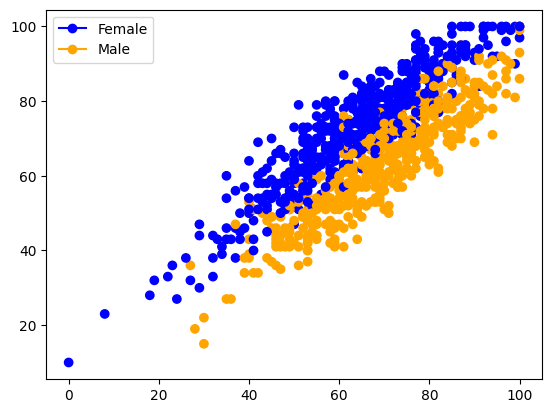

In [62]:

from matplotlib.lines import Line2D 
plt.scatter(df_students['math score'], df_students['writing score'], c=df_students['gender'].map({'male':'orange','female':'blue'}))
#plt.legend([Line2D([0], [0], color=cmap(0.), lw=4),
                #Line2D([0], [0], color=cmap(.5), lw=4)],['Math','Reading'])

#plt.legend([{color:'orange',color:'blue'}],['Math','Reading'])
legend_elements = [Line2D([0], [0], marker='o',color='blue', label='Female'),
                   Line2D([0], [0], marker='o', color='orange', label='Male')]
plt.legend(handles=legend_elements)


### Principle 2 : Connection

In [ ]:
df_students.describe()

,math score,reading score,writing score,total
count,1000.0,1000.0,1000.0,1000.0
mean,66.089,69.169,68.054,203.312
std,15.16308,14.600192,15.195657,42.771978
min,0.0,17.0,10.0,27.0
25%,57.0,59.0,57.75,175.0
50%,66.0,70.0,69.0,205.0
75%,77.0,79.0,79.0,233.0
max,100.0,100.0,100.0,300.0


#### Get student marks statistics like mean, median and then plot them

In [ ]:
df_student_stats=pd.DataFrame(df_students.describe())
df_student_stats=df_student_stats.loc[['std','mean','50%','75%']][['math score','reading score','writing score']]
df_student_stats


,math score,reading score,writing score
std,15.16308,14.600192,15.195657
mean,66.089,69.169,68.054
50%,66.0,70.0,69.0
75%,77.0,79.0,79.0


#### Bad example : Just plot the statistics of marks for Maths, Reading and Writing

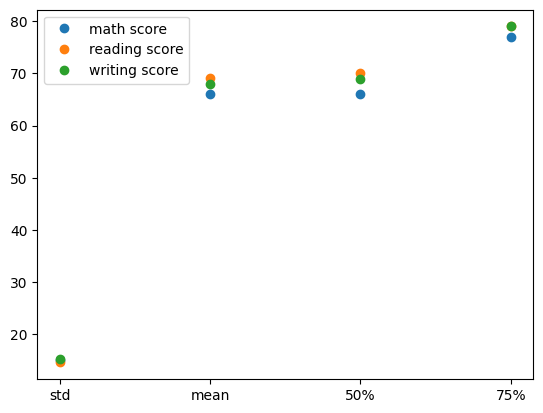

In [ ]:
plt.plot(df_student_stats, linestyle='',marker='o')
plt.legend(df_student_stats.columns)


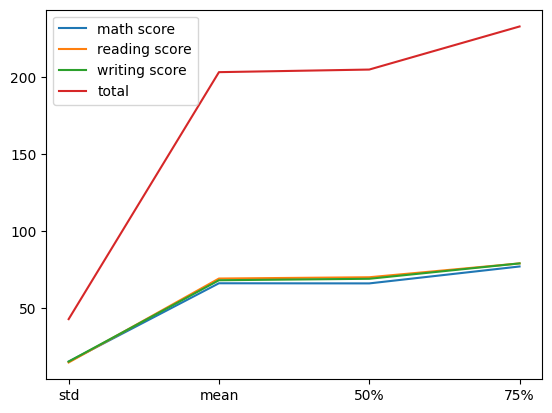

In [ ]:
plt.plot(df_student_stats)
#plt.plot(x, y, linestyle="-", marker="o", label="Expenses")
plt.legend(df_student_stats.columns)
plt.show()

Good Example : Plot the values with a connecting line so that interpretation is easy to see the change is the values, understanding the upward/downward trend.

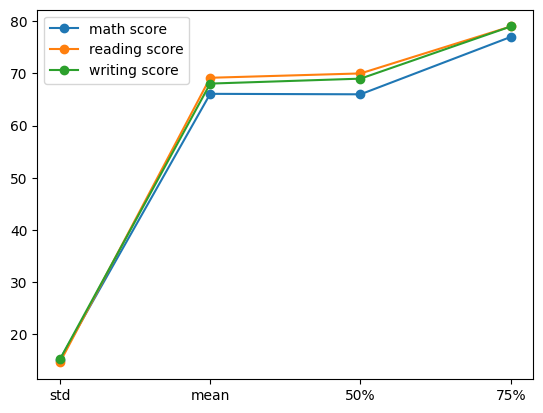

In [ ]:
plt.plot(df_student_stats,  marker="o")
#plt.plot(x, y, linestyle="-", marker="o", label="Expenses")
plt.legend(df_student_stats.columns)
plt.show()

In [ ]:
df_students['total'].nlargest(n=5)



458    300
916    300
962    300
114    299
179    297
Name: total, dtype: int64[pyarrow]

In [ ]:
df_students['total'].nsmallest(n=5)


59     27
980    55
596    69
327    70
17     78
Name: total, dtype: int64[pyarrow]

In [ ]:
nlargest = df_students['total'].nlargest(10)
nsmallest = df_students['total'].nsmallest(10)

nlargest

458    300
916    300
962    300
114    299
179    297
712    297
165    296
625    296
149    293
685    293
Name: total, dtype: int64[pyarrow]

In [ ]:

result = pd.concat([df_students.iloc[nlargest.index], df_students.iloc[nsmallest.index]]).sort_index()
print(result)

     gender     race parental level of education         lunch   
17   female  group B            some high school  free/reduced  \
59   female  group C            some high school  free/reduced   
76     male  group E            some high school      standard   
114  female  group E           bachelor's degree      standard   
149    male  group E          associate's degree  free/reduced   
165  female  group C           bachelor's degree      standard   
179  female  group D            some high school      standard   
211    male  group C                some college  free/reduced   
327    male  group A                some college  free/reduced   
338  female  group B            some high school  free/reduced   
458  female  group E           bachelor's degree      standard   
596    male  group B                 high school  free/reduced   
601  female  group C                 high school      standard   
625    male  group D                some college      standard   
685  femal

<AxesSubplot: >

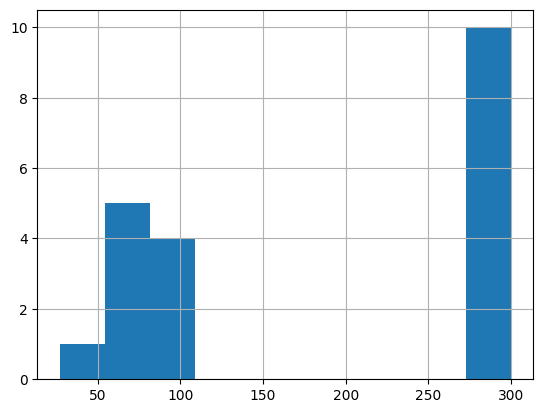

In [ ]:
result['total'].hist()

<AxesSubplot: title={'center': 'Histogram plotting Totsl marks'}, xlabel='Total Marks', ylabel='Frequency'>

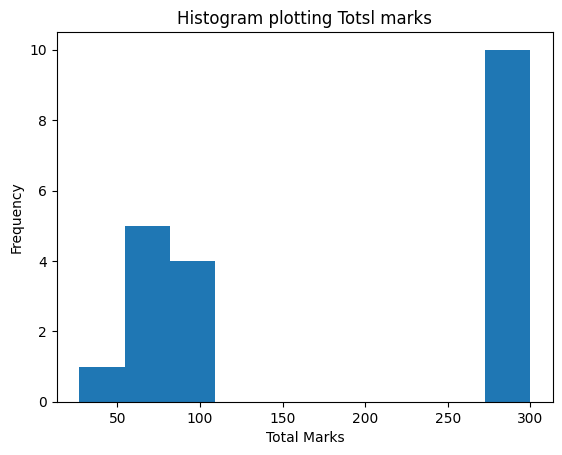

In [ ]:
result['total'].plot(kind='hist', title='Histogram plotting Total marks', xlabel='Total Marks')

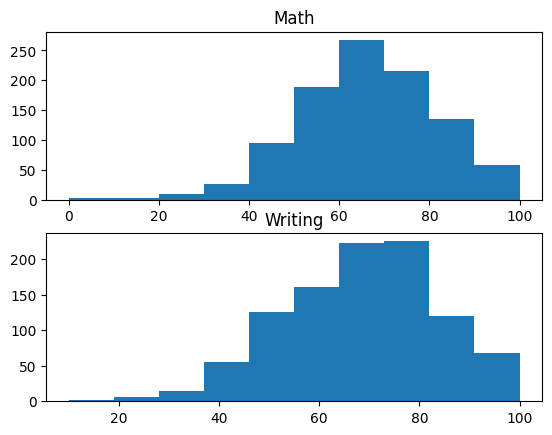

In [40]:
figure, axis = plt.subplots(2)
df_students_male=df_students[df_students['gender']=='male']
df_students_female=df_students[df_students['gender']=='female']

# For Sine Function
axis[0].hist( df_students['math score'])

axis[0].set_title("Math")
  
# For Cosine Function
axis[1].hist(df_students['writing score'])
axis[1].set_title("Writing")
  
# axis[2].hist(df_students['reading score'])
# axis[2].set_title("Reading")
# For Tangent Function
# axis[1, 0].plot(X, Y3)
# axis[1, 0].set_title("Tangent Function")
  
# # For Tanh Function
# axis[1, 1].plot(X, Y4)
# axis[1, 1].set_title("Tanh Function")
  
# Combine all the operations and display
plt.show()

(array([80.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 60.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

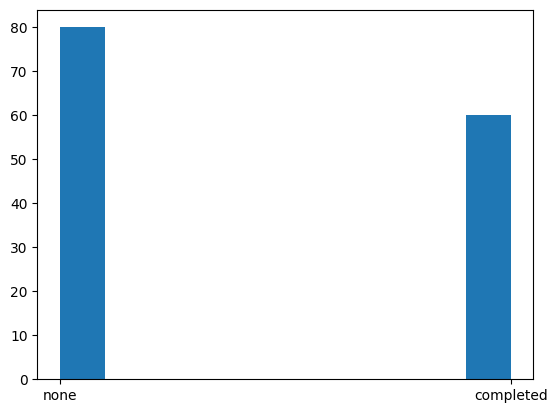

In [41]:
plt.hist(df_students[df_students['race']=='group E']['test preparation course'])

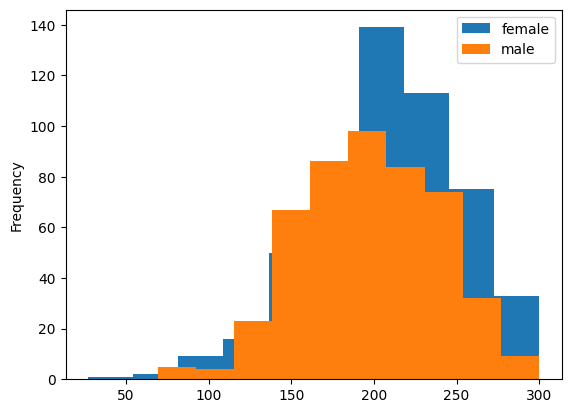

In [42]:
df_students.groupby('gender')['total'].plot(kind='hist')
plt.legend()
#df_students_male['total'].plot(kind='kde')
